# **Ejemplo: Uso  de la clase UTPAnomaly para la detección de anomalías en imágenes, videos y transmisiones.**

La clase UTPAnomaly es un clasificador personalizado que utiliza el modelo CLIP de OpenAI para la clasificación de imágenes y videos. CLIP (Contrastive Language–Image Pretraining) es un modelo avanzado que ha sido entrenado para entender y relacionar texto e imágenes, lo que lo hace muy útil para tareas de clasificación basadas en etiquetas textuales.

Claro, vamos a profundizar en la explicación sobre cómo funciona la clase `UTPAnomaly`, cómo se utiliza para clasificar imágenes y videos, y algunos detalles sobre las tecnologías y técnicas involucradas.

### Explicación Detallada de la Clase `UTPAnomaly`

La clase `UTPAnomaly` es un clasificador personalizado que utiliza el modelo CLIP de OpenAI para la clasificación de imágenes y videos. CLIP (Contrastive Language–Image Pretraining) es un modelo avanzado que ha sido entrenado para entender y relacionar texto e imágenes, lo que lo hace muy útil para tareas de clasificación basadas en etiquetas textuales.

#### Componentes Principales de la Clase `UTPAnomaly`

1. **Constructor (`__init__`)**: 
   - Inicializa el modelo CLIP y la función de preprocesamiento.
   - Configura el dispositivo de cálculo (CPU o GPU).
   - Acepta un diccionario `label_dict` con dos categorías: "Anomaly" y "Not Anomaly", cada una conteniendo una lista de etiquetas que describen esa categoría.

2. **Método de Clasificación (`get_classification`)**: 
   - Toma un frame (imagen) como entrada.
   - Preprocesa la imagen para que sea compatible con el modelo CLIP.
   - Tokeniza las etiquetas de texto para ambas categorías.
   - Utiliza el modelo CLIP para obtener las probabilidades de que la imagen pertenezca a cada una de las etiquetas.
   - Calcula una puntuación de anomalía como una proporción de las probabilidades máximas entre las categorías "Anomaly" y "Not Anomaly".

#

## Imágenes


### Uso de la Clase para Clasificación de Imágenes

Para clasificar una imagen:

1. **Cargar la Imagen**: 
   - Utiliza `PIL` o `cv2` para cargar una imagen desde un archivo.
   - Asegúrate de que la imagen esté en un formato compatible (como RGB para `PIL`).

2. **Clasificar la Imagen**:
   - Convierte la imagen al formato adecuado si es necesario (por ejemplo, usando `cv2.cvtColor` para convertir a RGB si estás usando `cv2`).
   - Usa el método `get_classification` de la clase `UTPAnomaly` para obtener la puntuación de anomalía.


In [1]:
################## LIBRERÍAS ####################
from utpanomaly import *

Inicializa la clase UTPAnomaly con las etiquetas apropiadas para "Anomaly" y "Not Anomaly":

In [2]:
label_dict = {
    "Anomaly": ["violence"],
    "Not Anomaly": ["pedestrian"]
}

classifier = UTPAnomaly(label_dict=label_dict)

Carga la imagen

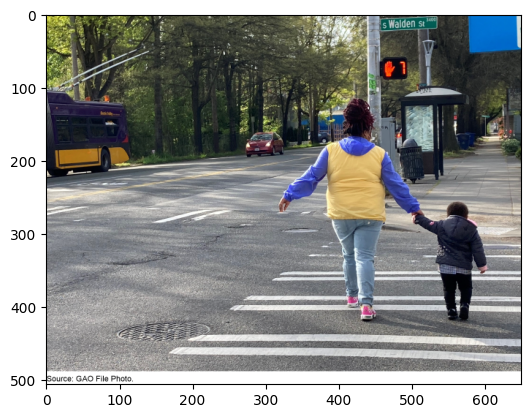

In [3]:
import matplotlib.pyplot as plt
image_path = 'examples/noviolencia.png'
image = Image.open(image_path)
plt.imshow(image)
plt.show()

Ahora, utiliza el método get_classification para clasificar la imagen.

In [4]:
frame = cv2.imread(image_path)
anomaly_score = classifier.get_classification(frame)
print(f"Puntuación de Anomalía: {anomaly_score}")

Puntuación de Anomalía: 0.0013099823845550418


Mismo ejemplo para una imagen de violencia

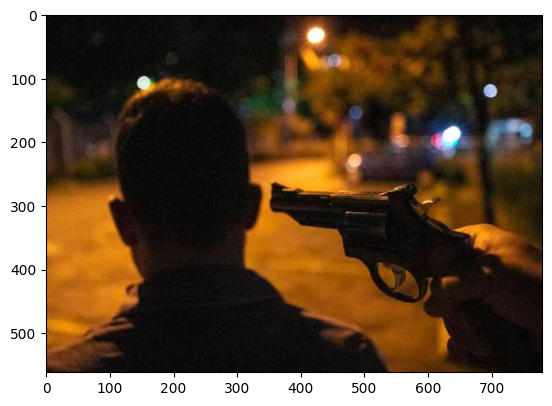

In [5]:
image_path = 'examples/ARMA.jpg'
image = Image.open(image_path)
plt.imshow(image)
plt.show()

In [6]:
frame = cv2.imread(image_path)
anomaly_score = classifier.get_classification(frame)
print(f"Puntuación de Anomalía: {anomaly_score}")

Puntuación de Anomalía: 0.9395148754119873


# VIDEOS


Para realizar la inferencia sobre todo un video. Importante resaltar que lo recomendable es realizarla cada n frames, para así optimizar

In [7]:
from IPython.display import Video

Video("examples/Disparos.mp4")

In [8]:
video_path = 'examples/Disparos.mp4'
cap = cv2.VideoCapture(video_path)

anomaly_scores = []  # Lista para almacenar las puntuaciones por frame

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Procesar el frame para obtener la puntuación de anomalía
    anomaly_score = classifier.get_classification(frame)
    anomaly_scores.append(anomaly_score)

cap.release()
cv2.destroyAllWindows()


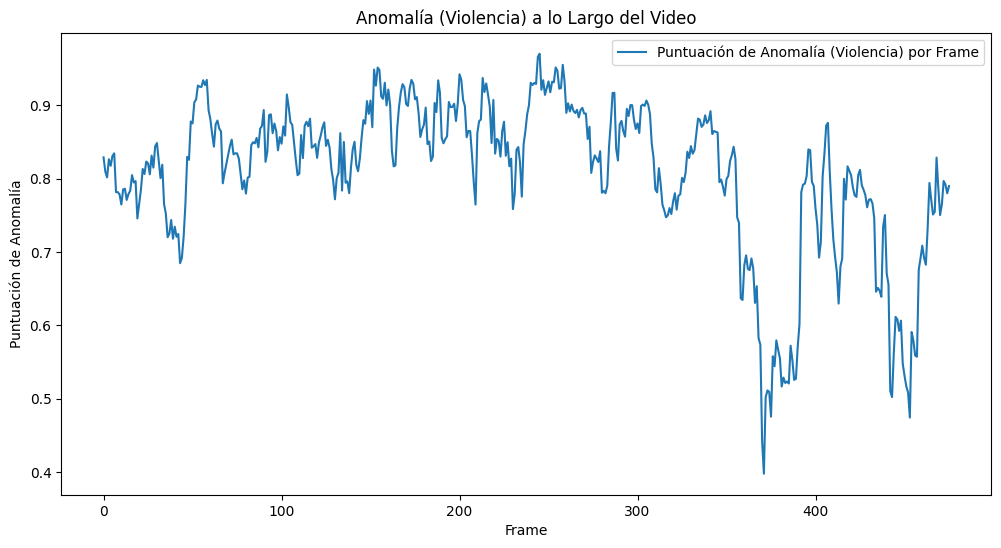

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(anomaly_scores, label='Puntuación de Anomalía (Violencia) por Frame')
plt.xlabel('Frame')
plt.ylabel('Puntuación de Anomalía')
plt.title('Anomalía (Violencia) a lo Largo del Video')
plt.legend()
plt.show()


# Transimisión RTSP/RTMP/Live Image

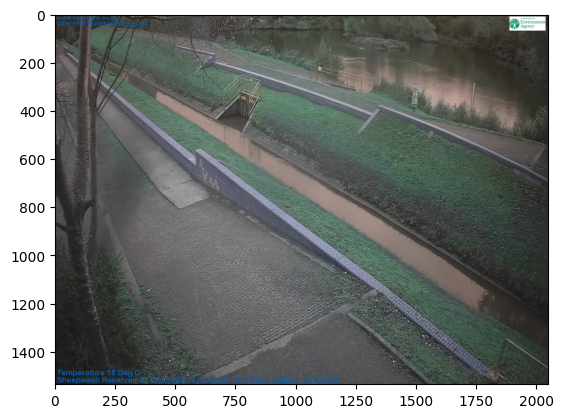

Puntuación de Anomalía: 0.0031334697268903255


In [12]:
rtmp_url = "https://images.vision-link.cloud/VL_Processed_Image/Sheepwash2.jpg"  # Reemplaza con tu URL de transmisión RTMP

cap = cv2.VideoCapture(rtmp_url)

if not cap.isOpened():
    print("Error: No se pudo abrir la transmisión.")
else:
    ret, frame = cap.read()

    if ret:
        # Opcional: Mostrar el frame
        anomaly_score = classifier.get_classification(frame)
        plt.imshow(frame)
        plt.show()
        print(f"Puntuación de Anomalía: {anomaly_score}")
    else:
        print("Error: No se pudo leer el frame.")

cap.release()
